## Visualization exercise
```In the following exercise you are to practice simple data scientist tasks. Mainly, you learn about a few common, useful but slightly advanced visualization methods. You will work with the Chicago Crime data, which concerns crimes in Chicago. You will be asked to draw some of this data features.```

```~Ittai Haran```

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

```Start with loading the data.```

In [2]:
df = pd.read_csv('resources/Crimes_-_2001_to_present.csv')

```What are the types of the columns? Which columns contain numbers? Which contain nans?
Among the categorical columns that contain nans, how many distinct values are there?```

In [3]:
columns_floats = df.columns[df.dtypes == float]
columns_with_nans = df.columns[df.isnull().any()]

In [4]:
for col in columns_with_nans:
    if not col in columns_floats:
        print(col + ': ' + str(len(set(df[col][np.logical_not(df[col].isnull())]))) + ' different values')

Case Number: 6491706 different values
Location Description: 173 different values
Location: 850795 different values


```Plot the distribution of each of the numeric features (hist: plt.hist, or pd.DataFrame.hist).
Also, If there are columns that have missing values, but also have less than 200 different values, plot their histogram ( maybe by using sns.categorical.countplot).```

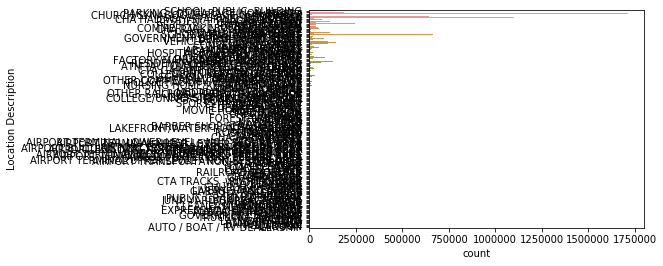

3003 nans


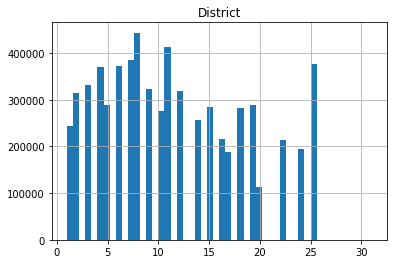

49 nans


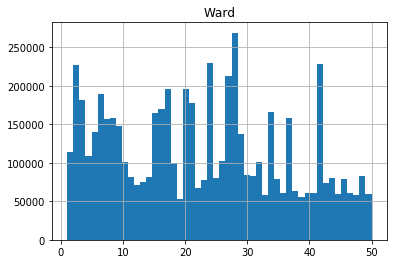

614853 nans


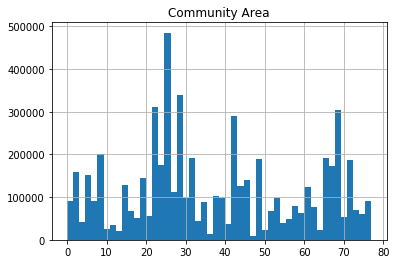

616029 nans


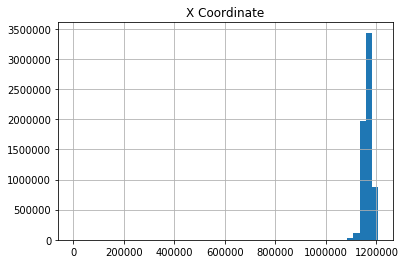

87471 nans


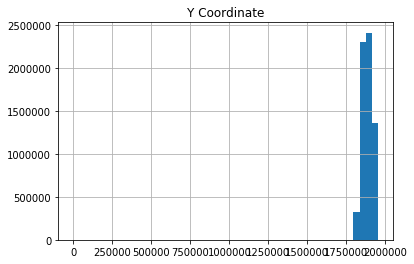

87471 nans


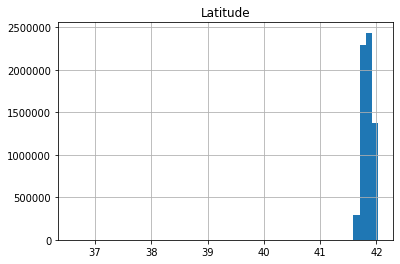

87471 nans


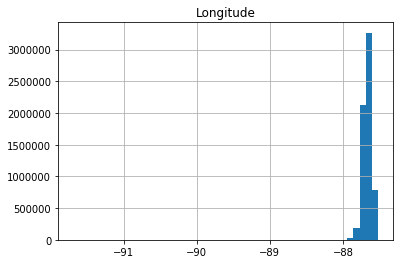

87471 nans


In [5]:
for col in columns_with_nans:
    if col in columns_floats:
        df[col].hist(bins = 50)
        plt.title(col)
    elif col == 'Location Description':
        sns.categorical.countplot(y = col, data = df[np.logical_not(df[col].isnull())], orient='v')
    else:
        continue
    plt.show()
    print(str(sum(df[col].isnull())) + ' nans')

```Now plot the number of crimes in Chicago per month, and the number of arrests per month. Use df.plot.```

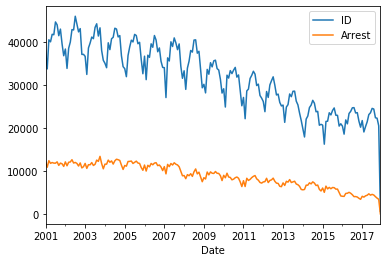

In [6]:
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.set_index('Date').resample('1m').agg({'ID':len, 'Arrest':sum}).plot()
plt.show()

```Do the same for weeks rather than months. Use df.resample.```

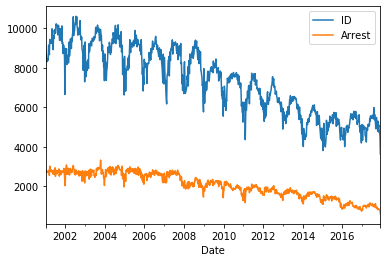

In [7]:
df.set_index('Date').resample('1W').agg({'ID':len, 'Arrest':sum}).plot()
plt.show()

```Lets look at the distribution of 'Ward', for Arrest=True and for Arrest=False. Use sns.violinplot.```

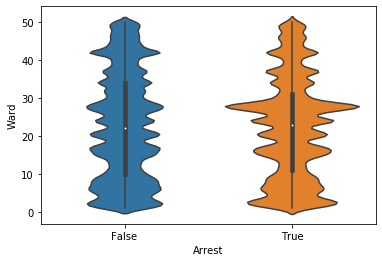

In [10]:
sns.violinplot(data = df, x = 'Arrest', y = 'Ward')
plt.show()

```Plot in the same graph, for each Primary Type, the number of crimes of this type, for each month. Do it using df.pivot_table.```

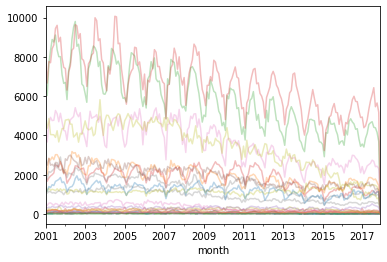

In [11]:
df['month'] = df['Date'].dt.to_period('m')
df[['month', 'Primary Type']].dropna().pivot_table(index = 'month', columns = ['Primary Type'], aggfunc = len).plot(legend=False, alpha = 0.3)
plt.show()

```Let's focus on the features 'X Coordinate', 'Y Coordinate'. What is the relation between them? Use sns.pairplot and sns.jointplot to answer this question. You might want to get rid of the missing values before you act. Can you find another problem preventing you from understanding the relations between the features? What is it and how can you get rid of it?```

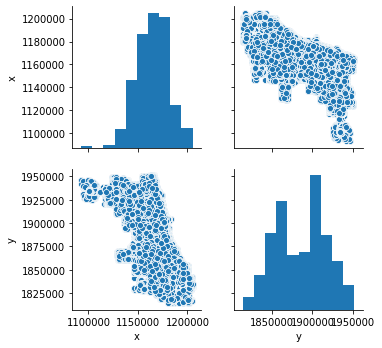

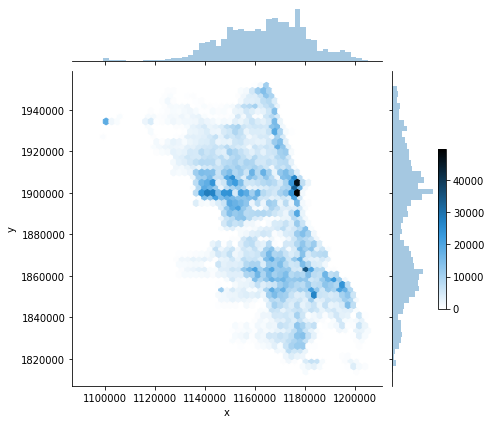

In [17]:
df_x_y = df.set_index('Date')[['X Coordinate', 'Y Coordinate']].dropna()
df_x_y.columns = ['x', 'y']
df_x_y = df_x_y[np.sum(df_x_y == 0, axis = 1) == 0]

sns.pairplot(df_x_y)
plt.show()
sns.jointplot('x', 'y', df_x_y, kind = 'hex')
plt.colorbar()
plt.show()

```Split the map into 25 districts, and plot the number of crime incidents in each one of them, per month. First rotate the map so it will be more 'square-like' (Hint: by a linear transformation).```

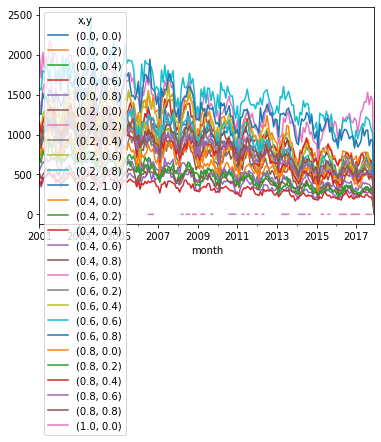

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca = PCA(2)
x_y_pcaed = pd.DataFrame(pca.fit_transform(df_x_y.dropna()), columns = ['x', 'y'], index = df_x_y.index)

x_y_pcaed_percentiles = pd.DataFrame(x_y_pcaed.rank().values/float(len(x_y_pcaed)), columns = ['x', 'y'], index = x_y_pcaed.index)
x_y_pcaed_cliped = x_y_pcaed[((x_y_pcaed_percentiles['x']>0.1).astype(int)+(x_y_pcaed_percentiles['y']>0.1).astype(int)+
                              (x_y_pcaed_percentiles['x']<0.9).astype(int)+(x_y_pcaed_percentiles['y']<0.9).astype(int)) == 4]
x_y_pcaed_cliped = pd.DataFrame((MinMaxScaler().fit_transform(x_y_pcaed_cliped)*5).astype(int)/5.0, columns = ['x', 'y'],
                               index = x_y_pcaed_cliped.index)
x_y_pcaed_cliped['month'] = x_y_pcaed_cliped.index.to_period('m')
x_y_pcaed_cliped.pivot_table(index = 'month', columns = ['x', 'y'], aggfunc=len).plot()

```Bonus: create a word cloud from the words you can find in the 'Description' field.```

In [14]:
from wordcloud import WordCloud

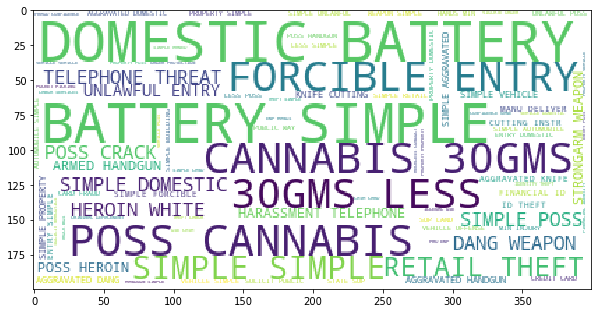

In [15]:
string_of_descs = ' '.join(list(df['Description']))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(string_of_descs)

fig = plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.show()